In [153]:
%load_ext autoreload
%autoreload 2
import warnings
import numpy as np
import time
import os
from dotenv import load_dotenv
os.environ["USE_PYGEOS"] = "0"
import napari_sparrow as nas
from spatialdata import read_zarr
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import sample 
import scanpy as sc
import seaborn as sns
import anndata as ad
%run own_and_modified_functions.ipynb
warnings.simplefilter(action='ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
OUTPUT_DIR = '/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/A1-1'
name_anndata = 'anndataNucA11_all_0threshold_shape_distances'
anndata = sc.read(OUTPUT_DIR + '/' + name_anndata) # get original anndata after Sparrow

In [129]:
annotation = 'annotation_tangram_11'

In [130]:
cell_types_thesis_7 = ['Hepatocyte','Endothelial cell','Stromal cell','B cell','Kupffer cell','Cholangiocyte','Other immune cell']
cell_types_thesis_12 = ['Hepatocyte','PVEC','CVEC','LSEC','Mesothelial cell','Fibroblast','Stellate cell','B cell','Kupffer cell','Cholangiocyte','Portal LAM','Other immune cell']
cell_types_thesis_all = cell_types_thesis_7 + cell_types_thesis_12
cell_types_thesis_all = list(dict.fromkeys(cell_types_thesis_all))

In [131]:
name_dict = {'Hepa':'Hepatocyte',
 'Endo':'Endothelial cell',
 'Strom':'Stromal cell',
 'B cell':'B cell',
 'Kupf':'Kupffer cell',
 'Chol':'Cholangiocyte',
 'Oth im':'Other immune cell',
 'Portal vein':'PVEC',
 'Central vein':'CVEC',
 'LSEC':'LSEC',
 'Meso':'Mesothelial cell',
 'Fibr':'Fibroblast',
 'Stel':'Stellate cell',
 'Portal LAM':'Portal LAM',
 'Unknown':'Unknown'}

In [132]:
# substitute values in anndata.obs[annotation] with the values in name_dict
keys = list(name_dict.keys())
for i in range(len(keys)):
    anndata.obs[annotation] = anndata.obs[annotation].replace(keys[i],name_dict[keys[i]])

In [133]:
color_dict_RESOLVE={'B cell': '#a4be5c', 
'Cholangiocyte': '#7f007f', 
'Hepatocyte': '#ff8c00', 
'Kupffer cell': '#ff0000', 
'LSEC': '#2a9df4',
'Mesothelial cell': '#7b3f00', 
'CVEC': '#0000cd', 
'PVEC': '#00ffff', 
'Other immune cell': '#2e8b57', 
'Fibroblast': '#ff1493',
'Stellate cell': '#ffea17', 
'Portal LAM': '#00fa9a', 
'Endothelial cell': '#0096ff', 
'Stromal cell': '#d4af37',
'unknown_celltype': '#696969', #dim gray
'Unknown': '#696969'} #dim gray

In [134]:
#light blue hexa code: #add8e6

In [135]:
# 'annotation_name' is the column in the anndata.obs with the annotation of the cells
colors=[color_dict_RESOLVE[i] for i in anndata.obs[annotation].astype('category').cat.categories]
anndata.uns[annotation+'_colors']=colors

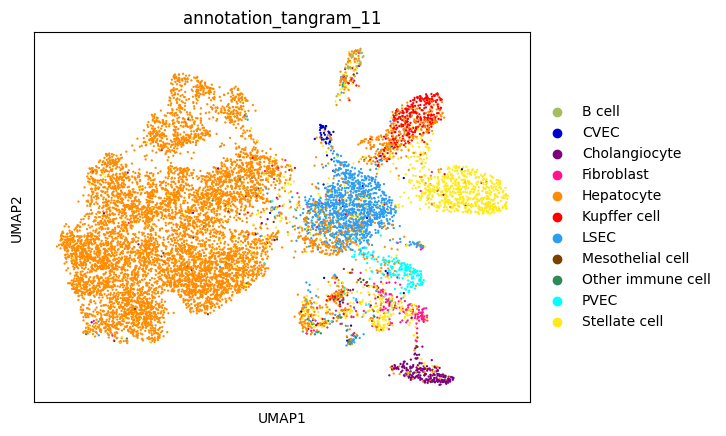

In [136]:
sc.pl.umap(anndata,color=[annotation])

In [145]:
OUTPUT_DIR = '/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/A1-1'
name_anndata = 'anndataNucA11'
anndata = sc.read(OUTPUT_DIR + '/' + name_anndata)
n_pca = np.count_nonzero(anndata.uns['pca']['variance_ratio'] > 0.01)
make_umap(anndata,n_PCAs=n_pca,n_neighbors=15)

Hepa            39.076487
LSEC            12.390322
Unknown         11.007711
Chol             9.722592
Stel             6.425596
Kupf             6.248338
Portal vein      3.394487
Oth im           2.738633
Fibr             2.260037
B cell           2.073917
Meso             1.781441
Portal LAM       1.630772
Central vein     1.249668
Name: annotation_own_score_genes_BasicMartin_12, dtype: float64


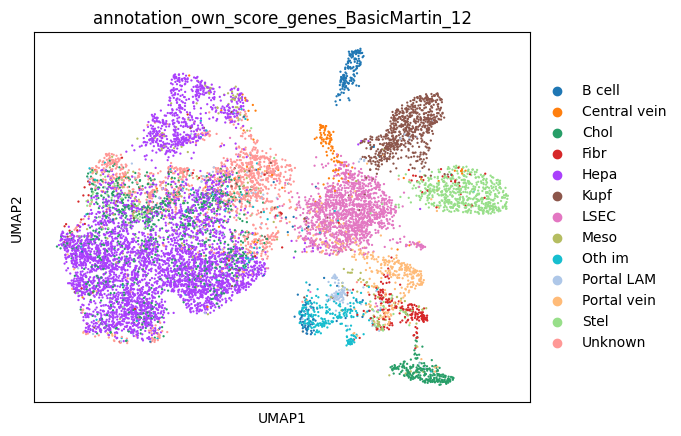

Percentage of cells with changed annotation: 19.82


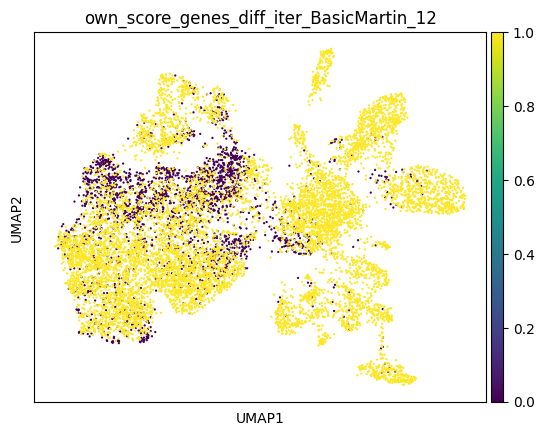

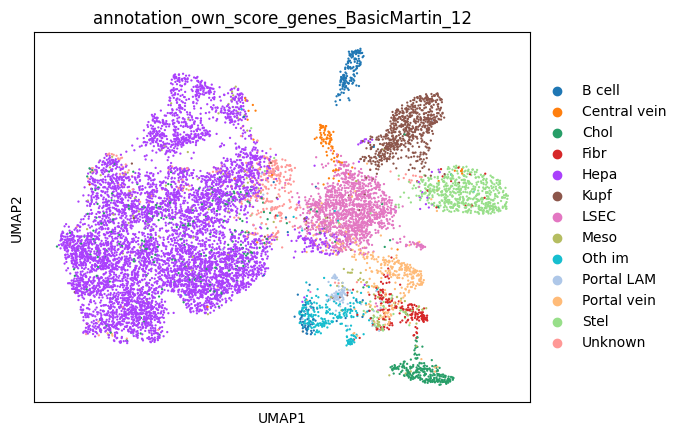

Hepa            57.272002
LSEC            11.654702
Kupf             5.991314
Stel             5.654525
Chol             4.263051
Unknown          3.261544
Portal vein      2.898165
Oth im           2.215723
B cell           1.923247
Fibr             1.745990
Meso             1.223079
Portal LAM       0.983781
Central vein     0.912878
Name: annotation_own_score_genes_BasicMartin_12, dtype: float64
Percentage of cells with changed annotation: 4.29


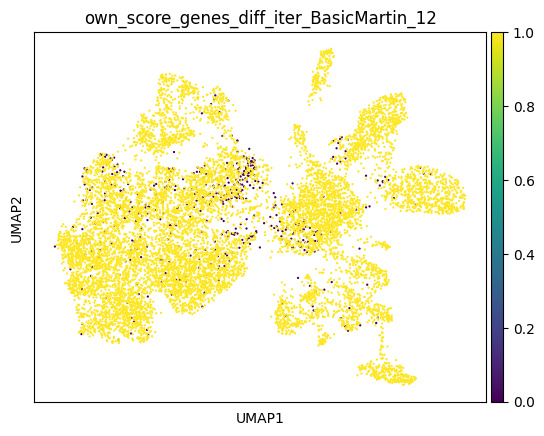

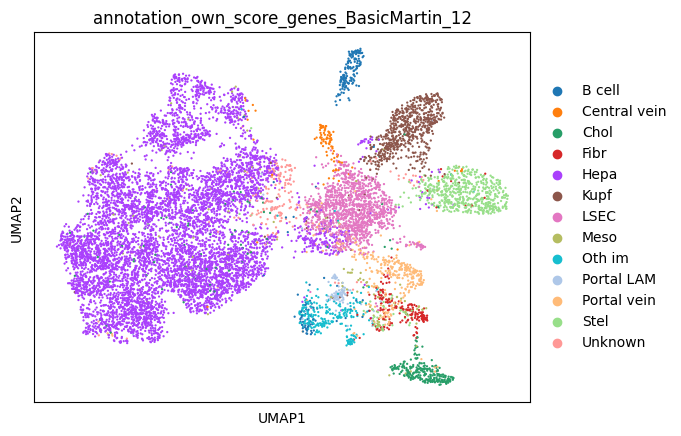

Hepa            61.171674
LSEC            11.193831
Kupf             5.876097
Stel             5.627936
Chol             2.889302
Portal vein      2.774085
Oth im           2.171408
B cell           1.967562
Unknown          1.887796
Fibr             1.666224
Meso             1.028095
Central vein     0.877426
Portal LAM       0.868563
Name: annotation_own_score_genes_BasicMartin_12, dtype: float64
Percentage of cells with changed annotation: 0.96


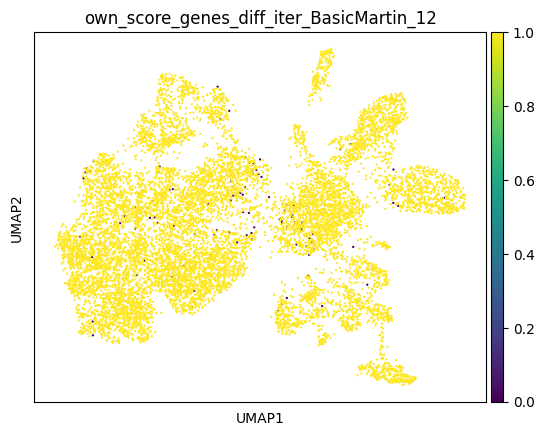

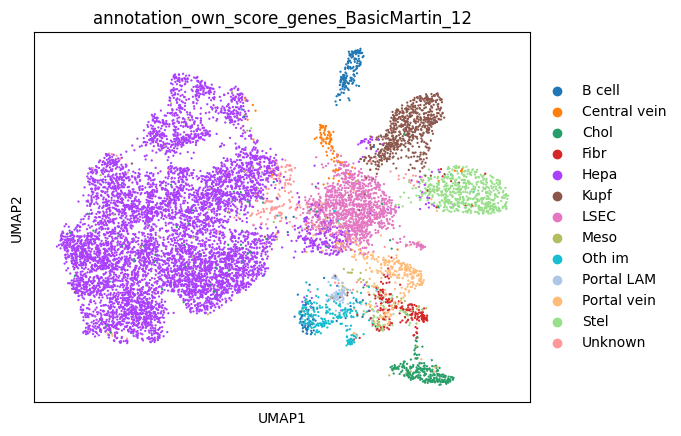

Hepa            62.013649
LSEC            10.981122
Kupf             5.849508
Stel             5.627936
Portal vein      2.747496
Chol             2.667730
Oth im           2.135957
B cell           1.976425
Unknown          1.701675
Fibr             1.666224
Meso             0.939466
Central vein     0.850838
Portal LAM       0.841975
Name: annotation_own_score_genes_BasicMartin_12, dtype: float64
Percentage of cells with changed annotation: 0.27


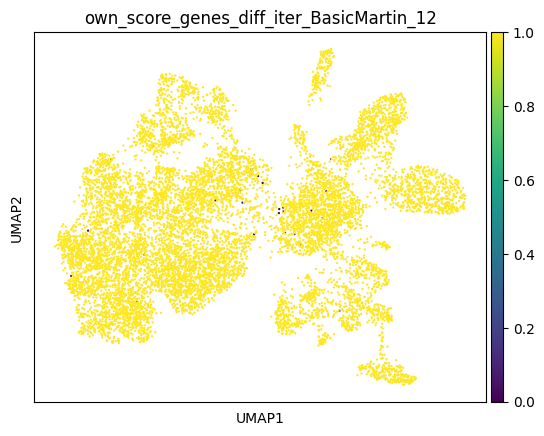

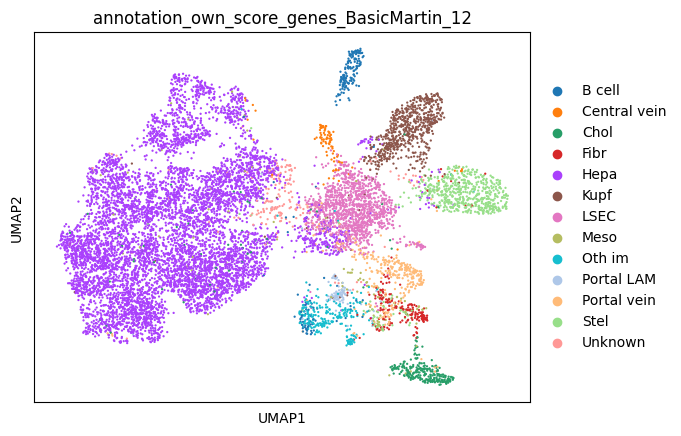

Hepa            62.217495
LSEC            10.919082
Kupf             5.840645
Stel             5.636799
Portal vein      2.729770
Chol             2.614553
Oth im           2.135957
B cell           1.976425
Unknown          1.666224
Fibr             1.657361
Meso             0.921741
Central vein     0.850838
Portal LAM       0.833112
Name: annotation_own_score_genes_BasicMartin_12, dtype: float64
Percentage of cells with changed annotation: 0.06


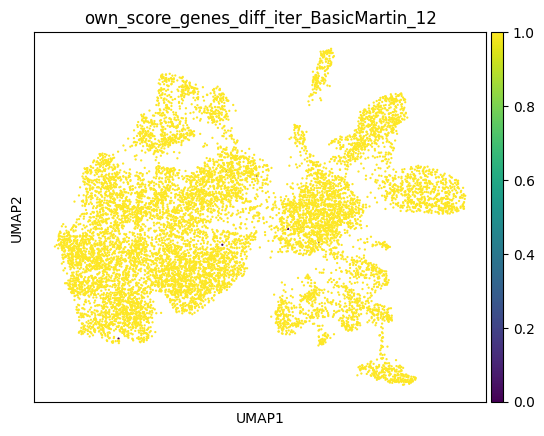

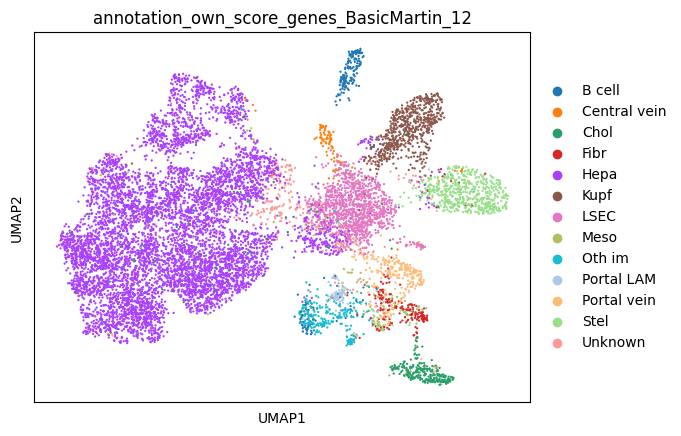

Hepa            62.279536
LSEC            10.901356
Kupf             5.840645
Stel             5.627936
Portal vein      2.729770
Chol             2.605690
Oth im           2.135957
B cell           1.976425
Fibr             1.657361
Unknown          1.648498
Meso             0.912878
Central vein     0.850838
Portal LAM       0.833112
Name: annotation_own_score_genes_BasicMartin_12, dtype: float64
Percentage of cells with changed annotation: 0.03
converged


(           Hepa      LSEC  Portal vein  Central vein      Chol      Kupf  \
 0           NaN       NaN          NaN           NaN       NaN       NaN   
 1           NaN       NaN          NaN           NaN       NaN  1.422283   
 2           NaN       NaN          NaN           NaN       NaN       NaN   
 3           NaN       NaN     0.058442           NaN       NaN       NaN   
 4           NaN       NaN          NaN           NaN       NaN       NaN   
 ...         ...       ...          ...           ...       ...       ...   
 11278  0.035253       NaN          NaN           NaN       NaN  1.182643   
 11279  0.626923       NaN          NaN           NaN  0.133462       NaN   
 11280       NaN       NaN          NaN           NaN       NaN  1.273499   
 11281  0.246310  0.021495          NaN           NaN       NaN       NaN   
 11282  0.487644       NaN          NaN           NaN  0.098196       NaN   
 
            Stel      Fibr  B cell      Meso  Portal LAM    Oth im  
 0   

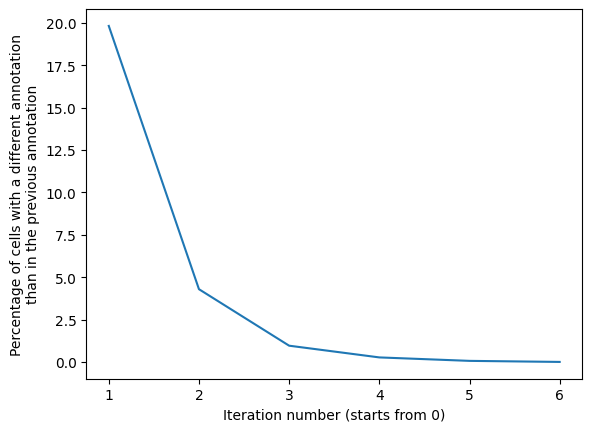

In [154]:
path_mg_BasicMartin = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/BasicMartin.csv"
own_score_genes_iterative(anndata,path_mg_BasicMartin,nr_iterations=8,suffix='_BasicMartin_12',save=True,saved_as='',plots=True)